# Bengaluru Real estate price prediction

## Hi i have done my regression model using Bengaluru real estate dataset

In [1]:
# importing required library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

# Importing Data set

In [2]:
df=pd.read_csv('datasets_20710_26737_Bengaluru_House_Data.csv')

# Explore data

# INTRODUCTION
Bengaluru Real Estate Price Prediction is a data science project aimed at predicting housing prices in Bengaluru, India, based on various features such as location, square footage, number of bedrooms, and bathrooms. The project utilizes machine learning techniques to build a predictive model that can assist real estate stakeholders in estimating property prices accurately.

## **Data structure**

#### I Have look the data set shape,size,coloumn names,sample dataset,using these code

In [3]:
df.shape

(13320, 9)

In [4]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [5]:
df.sample(3)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
1724,Super built-up Area,Ready To Move,Thanisandra,1 BHK,Bhmesy,620 - 933,NaN,NaN,48.145
12574,Super built-up Area,Ready To Move,Sadhguru Layout,1 BHK,NaN,2559,1.0,1.0,55.000
6585,Plot Area,18-May,TC Palaya,3 Bedroom,NaN,1500,3.0,0.0,83.000


In [6]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

## **Data Summary**

#### I have analysed the data summary like information,correlation using these code

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


<AxesSubplot:>

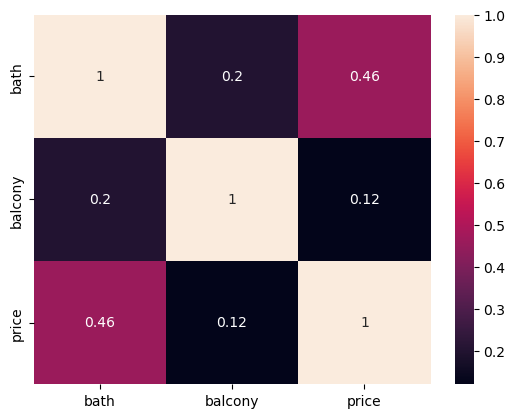

In [8]:
sb.heatmap(round(df.corr(),2),annot=True)

# Data Cleaning

### I have find some null value and droped them,removed string from size column and removed some outlayer like the impractical data

In [9]:
df.drop(['area_type','availability','society','balcony'],axis=1,inplace=True) # these column does't need for prediction

In [10]:
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [11]:
df.isnull().sum() # we have some null values in this data and i'm droping those rows

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [12]:
df.shape

(13320, 5)

**Exploring size column for further analysis**

In [13]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [14]:
df['size']=df['size'].astype('category')

In [15]:
df.dtypes

location        object
size          category
total_sqft      object
bath           float64
price          float64
dtype: object

In [16]:
df['bhk']=df['size'].apply(lambda x: int(x.split(' ')[0])) # splited only number in new column to get numbers alone

In [17]:
df.bhk.unique()

array([ 2.,  4.,  3.,  6.,  1.,  8.,  7.,  5., 11.,  9., nan, 27., 10.,
       19., 16., 43., 14., 12., 13., 18.])

In [18]:
df.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2.0
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4.0
2,Uttarahalli,3 BHK,1440,2.0,62.00,3.0
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3.0
4,Kothanur,2 BHK,1200,2.0,51.00,2.0


In [19]:
df[df.bhk>20] # looks wrong data (Dosen't look practical)

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27.0
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43.0


In [20]:
df.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

#### I found few range of number and non numeric number so i tried to convert those things using these codes

In [21]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [22]:
df[~df['total_sqft'].apply(is_float)].head(10) # ~ which return opposite value

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4.0
56,Devanahalli,4 Bedroom,3010 - 3410,NaN,192.000,4.0
81,Hennur Road,4 Bedroom,2957 - 3450,NaN,224.500,4.0
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4.0
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2.0
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2.0
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2.0
224,Devanahalli,3 BHK,1520 - 1740,NaN,74.820,3.0
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1.0
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2.0


#### I'm taking range numbers and took average of those number for further analysis

In [23]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

#### I took the copy of that dataframe and stated appling the def function for further analysis

In [24]:
df1=df.copy()
df1['total_sqft']=df1['total_sqft'].apply(convert_sqft_to_num)
df1.head(3)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2.0
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4.0
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3.0


In [25]:
df1.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                 4.0
Name: 30, dtype: object

# Feature Engineering

In [26]:
df1.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2.0
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4.0
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3.0
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3.0
4,Kothanur,2 BHK,1200.0,2.0,51.00,2.0


In [27]:
df2=df1.copy()

#### I have created one more coloum for price per square feet
- Helps to remove outlayer from the dataset

In [28]:
df2['price_per_sqrt']= df2['price']*100000/df2['total_sqft']
df2.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqrt
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2.0,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4.0,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3.0,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3.0,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2.0,4250.000000


In [29]:
df2['location'].nunique()

1305

In [30]:
df2['location']=df2['location'].astype('category')

### Location wise total property

In [31]:
df2.location=df2.location.apply(lambda x: x.strip())

location_stats= df2.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield               541
Sarjapur  Road           399
Electronic City          304
Kanakpura Road           273
Thanisandra              237
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1294, dtype: int64

In [32]:
len(location_stats[location_stats<=10])

1053

In [33]:
location_stats_less_than_10= location_stats[location_stats<=10]
location_stats_less_than_10

location
Sadashiva Nagar          10
Nagappa Reddy Layout     10
Nagadevanahalli          10
Dodsworth Layout         10
1st Block Koramangala    10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1053, dtype: int64

In [34]:
df2['location'].nunique()

1294

#### Merging Location which has less than 10 property

In [35]:
df2.location=df2.location.apply(lambda x:'other' if x in location_stats_less_than_10 else x)
len(df2.location.unique()) # finaly reduced unique column to lower

243

# Outlier Removal

In [36]:
df2.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqrt
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2.0,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4.0,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3.0,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3.0,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2.0,4250.000000


In [37]:
df2[df2.total_sqft/df2.bhk<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqrt
9,other,6 Bedroom,1020.0,6.0,370.0,6.0,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8.0,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6.0,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8.0,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3.0,20000.000000


In [38]:
df2.shape

(13320, 7)

- I have removed outlayer which Seems unusual like shown above
- so i used these technique

In [39]:
df3=df2[~(df2.total_sqft/df2.bhk<300)]
df3.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqrt
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2.0,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4.0,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3.0,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3.0,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2.0,4250.000000


In [40]:
df3.shape

(12576, 7)

In [41]:
df3.price_per_sqrt.describe()

count     12530.000000
mean       6303.979357
std        4162.237981
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqrt, dtype: float64

### The above description show that it has more outlayer and i m going to remove the outlayer using the below def function

In [42]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for i,j in df.groupby('location'):
        m= np.mean(j.price_per_sqrt)
        st=np.std(j.price_per_sqrt)
        reduced_df= j[(j.price_per_sqrt>(m-st)) & (j.price_per_sqrt<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

In [43]:
df4=remove_pps_outliers(df3)
df4.shape

(10300, 7)

### Now we removed some outlayer

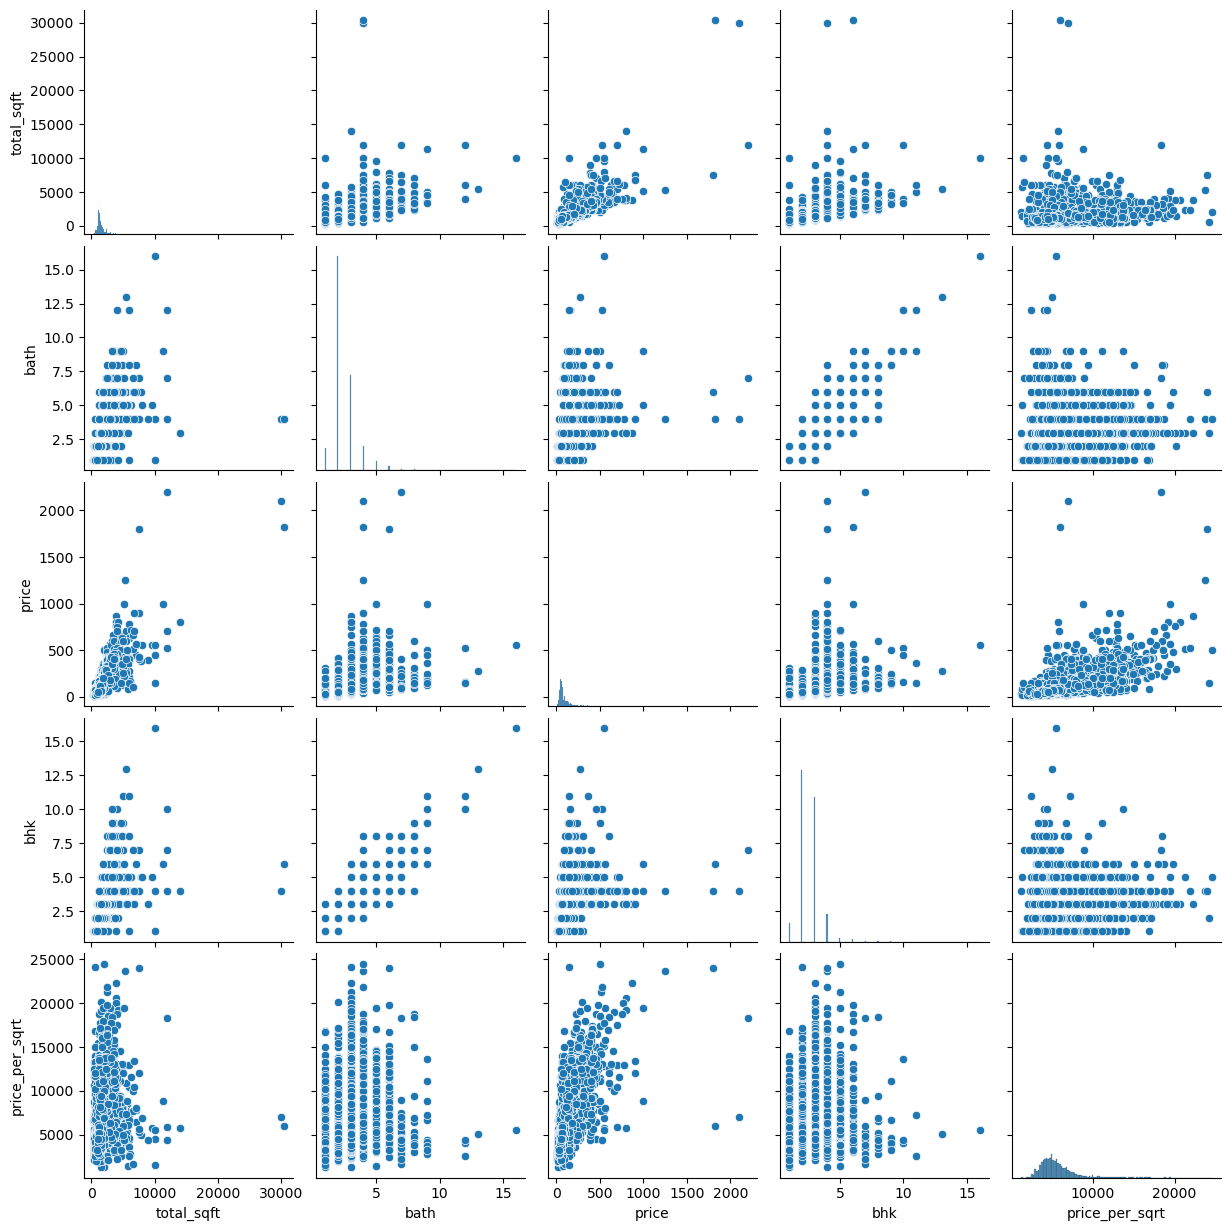

In [44]:
sb.pairplot(df4) #EDA

looking over each location

In [45]:
df['location'].sample(20)

11679                 Guddadahalli
9705               Sanne Amanikere
8707             Jakkur Plantation
8578                 Bisuvanahalli
13319                 Doddathoguru
7688                  Narayanapura
2653                   Munnekollal
5815                   Hennur Road
8663              Hebbal Kempapura
8479                      Nagavara
4089                Kanakpura Road
9030                  Rachenahalli
12322                       Harlur
1831                    Chamrajpet
11718              Old Madras Road
11954                 Indira Nagar
10811                     Kothanur
9880                     Bellandur
6467                    Whitefield
7173     Sarjapura - Attibele Road
Name: location, dtype: object

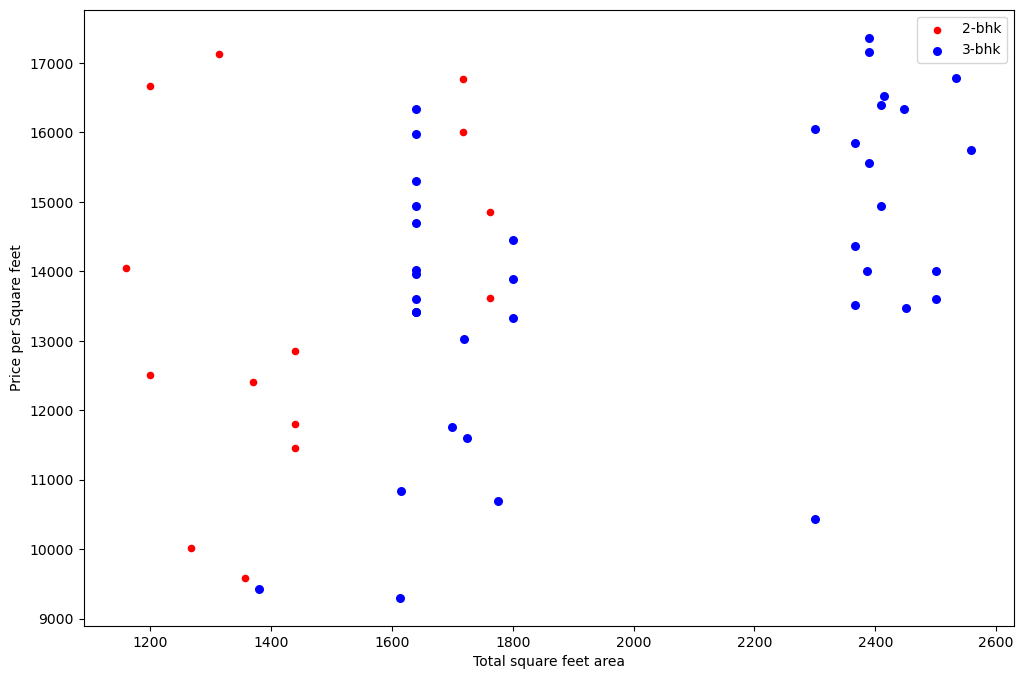

In [46]:
def plot_scatter_chart(df,location):
    bhk2=df[(df.location==location) & (df.bhk==2)]
    bhk3=df[(df.location==location) & (df.bhk==3)]
    plt.figure(figsize=(12,8))
    plt.scatter(bhk2['total_sqft'],bhk2['price_per_sqrt'],color='red',label='2-bhk',s=20)
    plt.scatter(bhk3['total_sqft'],bhk3['price_per_sqrt'],color='blue',label='3-bhk',s=30)
    plt.xlabel('Total square feet area')
    plt.ylabel('Price per Square feet')
    plt.legend()
plot_scatter_chart(df4,'Rajaji Nagar')

In [47]:
df.groupby('location')

**Look it has more outlier so i'm removing it**

In [48]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats= {}
        for bhk,bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqrt),
                'std': np.std(bhk_df.price_per_sqrt),
                'count': bhk_df.shape[0]
            }
        for bhk,bhk_df in location_df.groupby('bhk'):
            stats= bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices= np.append(exclude_indices, bhk_df[bhk_df.price_per_sqrt<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

df5= remove_bhk_outliers(df4)
df5.shape

(7362, 7)

## This code defines a function remove_bhk_outliers that removes outliers from a DataFrame df based on the price per square foot (price_per_sqrt) column. Here's a breakdown of the code:

### 1. Looping Through Locations:

- The DataFrame df is assumed to have columns like 'location', 'bhk', and 'price_per_sqrt'. The function groups the data by the 'location' column using groupby.

### 2. Calculating BHK Statistics:
- For each location, the function calculates statistics for different BHK (bedroom, hall, kitchen) configurations. For each BHK configuration, it calculates the mean, standard deviation, and count of the 'price_per_sqrt' values.

### 3. Identifying Outliers:

- For each BHK configuration, except for BHK 1, the function checks if there are more than 5 data points available for the previous BHK configuration (e.g., if there are more than 5 data points for 1 BHK, the function checks for outliers in 2 BHK). If so, it retrieves the statistics for the previous BHK configuration.
- It then identifies outliers for the current BHK configuration by comparing the 'price_per_sqrt' values with the mean of the previous BHK configuration. If the 'price_per_sqrt' is less than the mean of the previous BHK configuration, it is considered an outlier.
- The indices of these outliers are added to the exclude_indices array.

### 4. Removing Outliers:

- After processing all BHK configurations for a location, the function drops the rows corresponding to the identified outlier indices using the drop method.

### 5. Return DataFrame:
- Finally, the function returns the DataFrame with outliers removed.

**This code essentially helps in filtering out outliers in the price per square foot based on the mean price per square foot of the previous BHK configuration, considering only those locations where there are more than 5 data points available for the previous BHK configuration.**

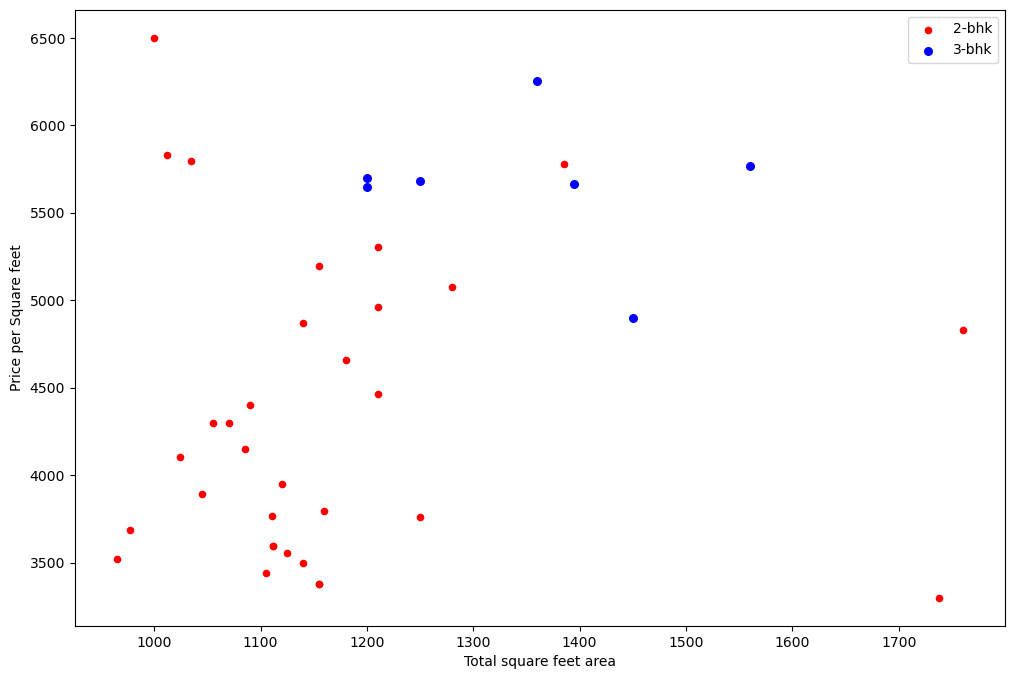

In [49]:
plot_scatter_chart(df5,'Varthur')

**Now its doest have outlier now its look good data for further analysis**

Text(0, 0.5, 'count')

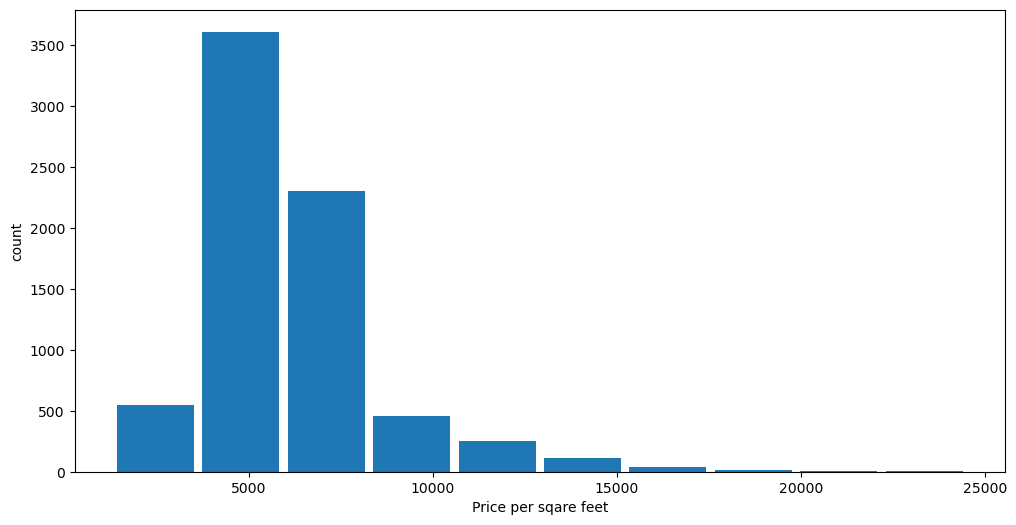

In [50]:
plt.figure(figsize=(12,6))
plt.hist(df5.price_per_sqrt,rwidth=0.9)
plt.xlabel('Price per sqare feet')
plt.ylabel('count')

we have majority of data on range of square foot of 0 to 10000

In [51]:
df5['bath'].unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6., nan,  7.,  9., 12., 16., 13.])

In [52]:
df5[df5.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqrt
5313,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10.0,4000.000000
8542,other,10 BHK,12000.0,12.0,525.0,10.0,4375.000000
8631,other,16 BHK,10000.0,16.0,550.0,16.0,5500.000000
9364,other,11 BHK,6000.0,12.0,150.0,11.0,2500.000000
9696,other,13 BHK,5425.0,13.0,275.0,13.0,5069.124424


In [53]:
df5[df5.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqrt
5313,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10.0,4000.000000
8542,other,10 BHK,12000.0,12.0,525.0,10.0,4375.000000
8631,other,16 BHK,10000.0,16.0,550.0,16.0,5500.000000
9364,other,11 BHK,6000.0,12.0,150.0,11.0,2500.000000
9696,other,13 BHK,5425.0,13.0,275.0,13.0,5069.124424


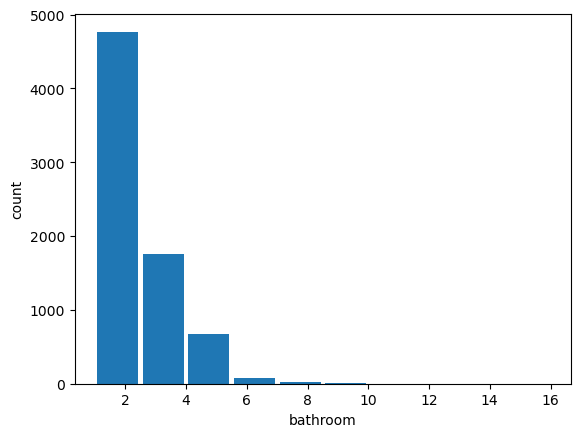

In [54]:
plt.hist(df5.bath,rwidth=.9)
plt.xlabel('bathroom')
plt.ylabel('count');

**Most of the datasets have 2 bathroom**

In [55]:
df5[df5.bath>df5.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqrt
1637,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4.0,3252.032520
5274,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4.0,6428.571429
6759,Thanisandra,3 BHK,1806.0,6.0,116.0,3.0,6423.034330
8467,other,6 BHK,11338.0,9.0,1000.0,6.0,8819.897689


In [56]:
df6=df5[df5.bath<df5.bhk+2]
df6.shape

(7246, 7)

In [57]:
df7=df6.drop(columns=['size','price_per_sqrt'],axis=1)
df7.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4.0
1,1st Block Jayanagar,1630.0,3.0,194.0,3.0
2,1st Block Jayanagar,1875.0,2.0,235.0,3.0
3,1st Block Jayanagar,1200.0,2.0,130.0,3.0
4,1st Block Jayanagar,1235.0,2.0,148.0,2.0


Now its almost ready for preparing model

In [58]:
remove_bhk_outliers(df5).shape

(6801, 7)

# Model Building(Real Estate Price Prediction Project)

Dummy variables, also known as indicator variables, are binary variables used to represent categorical data in regression analysis. Each category of a categorical variable is converted into a separate dummy variable, with a value of 1 indicating the presence of the category and 0 indicating its absence. These variables enable the inclusion of categorical data in regression models by assigning coefficients to each category.

In [59]:
dummies=pd.get_dummies(df7.location) # Hot encoding
dummies.head(2)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
df8=pd.concat([df7,dummies.drop('other',axis=1)],axis=1)
df8.head() # now droping location because we aldrady did hot encoding to it

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
df8.drop(columns='location',axis=1,inplace=True)

In [62]:
df8.sample(3)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
7505,1200.0,3.0,67.77,3.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
10140,1650.0,6.0,200.00,5.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2504,1745.0,3.0,104.00,3.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
df8.shape

(7246, 245)

# spliting input variable and target variable

**After convertion lets split dependent variable and independent variable**

In [64]:
x=df8.drop('price',axis=1)
y=df8['price']

spliting into train and test data

**now i imported train test split library which helps the data set to split it into train and test data**

In [65]:
from sklearn.model_selection import train_test_split   # training data has 70% data and 30% percentage for test
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=.30,random_state=42)


**Now importing required library for cross validation purpose**

# Cross validation

In [66]:
from sklearn.model_selection import KFold,StratifiedKFold,RepeatedStratifiedKFold,cross_val_score

# Comapre different ensembel models

**Now im importing required library for building model to select which model predict well**

In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor

**Giving variable name to each model**

In [68]:
model_linear=LinearRegression()
modoel_tree=DecisionTreeRegressor()
model_random=RandomForestRegressor()
model_ADA=AdaBoostRegressor()
model_svm=SVR()

In [69]:
models=[model_linear,modoel_tree,model_random,model_ADA,model_svm]
L,T,R,A,S=[],[],[],[],[]
splits=[2,3,4,5,6,7,8,9,10]
for i in splits:
    cv=KFold(n_splits=10,random_state=10,shuffle=True)
    for j in models:
        score=cross_val_score(j,x_train,y_train,cv=cv,n_jobs=-1)
        if j==model_linear:
            L.append(score.mean())
        elif j==modoel_tree:
            T.append(score.mean())
        elif j==model_random:
            R.append(score.mean())
        elif j==model_ADA:
            A.append(score.mean())
        elif j==model_svm:
            S.append(score.mean())

# Finally Linear model has more accuracy so i'm using that model for price prediction

**Comparing each model to get which has best accuracy**

In [70]:
pd.DataFrame({'n_splits':splits,'Linear Regression':L,'Decisiontree':T,'Random Forest':R,'Ada boost':A,'SVM':S},index=list(range(len(splits))))

,n_splits,Linear Regression,Decisiontree,Random Forest,Ada boost,SVM
0,2,0.838352,0.712519,0.780548,0.677673,0.574568
1,3,0.838352,0.721312,0.778956,0.672423,0.574568
2,4,0.838352,0.720584,0.779601,0.666577,0.574568
3,5,0.838352,0.708817,0.779212,0.668138,0.574568
4,6,0.838352,0.714015,0.779250,0.672360,0.574568
5,7,0.838352,0.722826,0.779502,0.662204,0.574568
6,8,0.838352,0.704896,0.780783,0.671439,0.574568
7,9,0.838352,0.701421,0.778034,0.669967,0.574568
8,10,0.838352,0.712011,0.779202,0.672989,0.574568


Linear Regression model has best accuracy score so we use it

**Now im fitting the model with linear regression model which has best accuracy and predicting the test data**

In [71]:
model_linear.fit(x_train,y_train)
Y_Pred=model_linear.predict(x_test)
Y_Pred

array([26.49960696, 65.43707865, 67.50530565, ..., 83.48501132,
       97.11584459, 59.55730517])

**Now importing the mse and mae to get the model evaluation of the regerssion model**

In [72]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

# Model Evalution

##### Model evaluation in regression involves assessing the performance of a regression model in predicting continuous outcomes. Common evaluation metrics include:

- Mean Absolute Error (MAE): Average of the absolute differences between predicted and actual values.
- Mean Squared Error (MSE): Average of the squared differences between predicted and actual values.
- Root Mean Squared Error (RMSE): Square root of the MSE, providing a measure in the same units as the target variable.
- R-squared (R²) Score: Proportion of the variance in the target variable that is explained by the model.
These metrics help gauge the accuracy and reliability of the regression model's predictions. Additionally, techniques like cross-validation and residual analysis are often used to validate and fine-tune regression models.

In [87]:
R2=model_linear.score(x_train,y_train)
inter=model_linear.intercept_
coef=model_linear.coef_
RMSE=mean_squared_error(Y_Pred,y_test,squared=False)
mae = mean_squared_error(Y_Pred,y_test)

In [88]:
print('R^2=',R2)
print('intercept=',inter)
print("Coefficent=",coef)
print('RMSE=',RMSE)
print("MAE=",mae)

R^2= 0.8696541513752256
intercept= -4.735912324992427
Coefficent= [ 7.58102552e-02  5.36303331e+00 -1.05327262e-01  9.71198138e+01
  1.60604608e+01 -5.37347155e+01  9.33569912e+01 -7.73759546e+01
 -3.80106339e+01 -8.60459085e+00 -1.70476133e+01 -4.33716251e+01
 -4.36477167e+01 -3.71833689e+01 -5.37920693e+01 -4.22456771e+01
 -2.43767138e+01 -3.00700913e+01 -2.87549178e+01 -4.23824473e+01
 -5.03113256e+01 -3.59012133e+01 -6.24704241e+01 -4.54078989e+01
 -3.61599395e+01 -3.88510200e+01 -1.99536870e+01  3.03089592e+01
 -3.50860931e+01 -5.25819434e+01 -2.92764626e+01 -1.45838939e+01
 -3.31035566e+01  8.74195467e+01 -3.21844182e+01 -6.12211573e+01
 -7.02038836e+01 -3.26921957e+01 -1.86865763e+01 -1.14585860e+01
 -3.18187461e+01  2.69145891e+01  1.52016566e+01 -5.16569865e+01
 -5.58021440e+01 -5.63326209e+01 -3.18976151e+01  1.54137331e+02
 -4.18171520e+01 -3.12748078e+01 -2.83258617e+01  2.61950097e+00
 -3.89622186e+01 -4.58826821e+01 -4.79497036e+01 -5.96017512e+01
 -2.49877433e-01 -2.3471

# Predicting

**Predicting on new values with the required features**

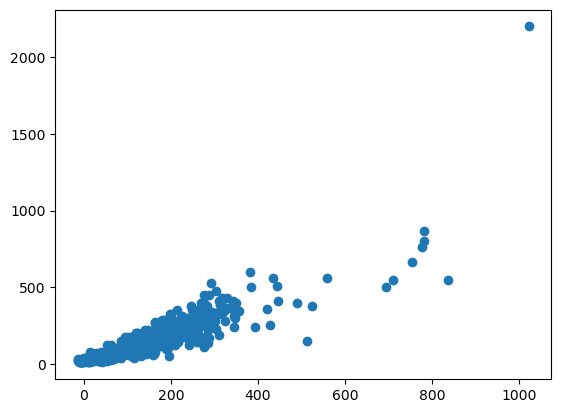

In [75]:
plt.scatter(Y_Pred,y_test); # predicted value

In [76]:
x.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [77]:
np.where(x.columns=='1st Block Jayanagar')[0][0]

3

**So now i created a user def function to get input of required features to predict using the model**

In [78]:
def predict_price(location,sqft,bath,bhk):
    loc_index=np.where(x.columns==location)[0][0]
    
    X=np.zeros(len(x.columns))
    X[0]=sqft
    X[1]=bath
    X[2]=bhk
    if loc_index >=0:
        X[loc_index]=1
    
    return model_linear.predict([X])[0]

predict_price('Vijayanagar',800,2,2)

41.56974201618565

In [79]:
# format in address,square-feet,bedroom,bathroom
predict_price('Vijayanagar',1200,8,3) # values need to consider in lacks

103.96671666112516

In [80]:
predict_price('Yelachenahalli',2000,3,2)

134.06336161041637

In [81]:
predict_price('Whitefield',1500,3,4)

98.48526242848183

**The above value are getting the predicted output**

# Exporting model

In [82]:
#pip install joblib

In [83]:
import pickle

In [84]:
with open('Bangalore_home_price_predicton_model.pickle','wb')as f:
    pickle.dump(model_linear,f)

**Now i exported the model using the pickle function**